In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

**Load data**
Dataset is downloaded from the source and uploaded to our Google Drive where we can access from Google's Colab environment by simply mounting the drive

In [62]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv("/content/drive/My Drive/Datasets/cause_of_deaths_dataset.csv")
df.head(10)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
5,Afghanistan,AFG,1995,3102,1225,394,3131,175,1881,2969,...,2248,3974,467,3087,6211,6823,3076,5843,434,3946
6,Afghanistan,AFG,1996,3193,1239,398,3175,175,1969,3331,...,2298,4041,485,3130,6446,7000,3133,5966,450,4098
7,Afghanistan,AFG,1997,3304,1253,402,3250,240,2078,3028,...,2347,4094,504,3203,6677,7168,3200,6096,469,4252
8,Afghanistan,AFG,1998,3281,1267,405,3193,563,2098,3098,...,2388,4120,505,3145,6683,7287,3231,6154,472,4310
9,Afghanistan,AFG,1999,3200,1281,409,3115,468,2084,2917,...,2437,4150,502,3068,6603,7400,3247,6182,470,4332


There are some missing values in some of the columns. The columns with death counts will be filled with zero.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

Values in the death count cells are floating numbers, lets convert them to integers as these values represent counts of death

In [65]:
df.iloc[:,4:] = df.iloc[:,4:].astype(int)
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


**Exploratory Data Analysis**

Top 10 causes of death for Turkey in 2017 (latest available year)

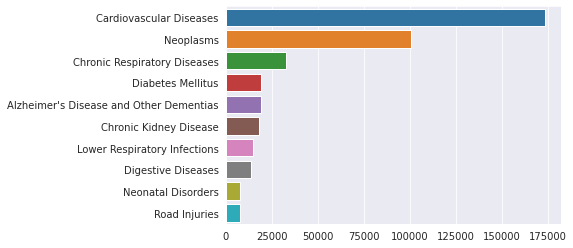

In [66]:
turkey_2017 = df[df.Code == "TUR"].groupby("Year").sum().loc[2017].sort_values(ascending=False)
sns.barplot(x=turkey_2017.values[:10],y=turkey_2017.index[:10],orient="h")
     

Display their percentage in pie graph:
  * Almost 4 out 10 deaths in Turkey are caused by Cardiovasculare diseases in 2017

Text(0, 0.5, '')

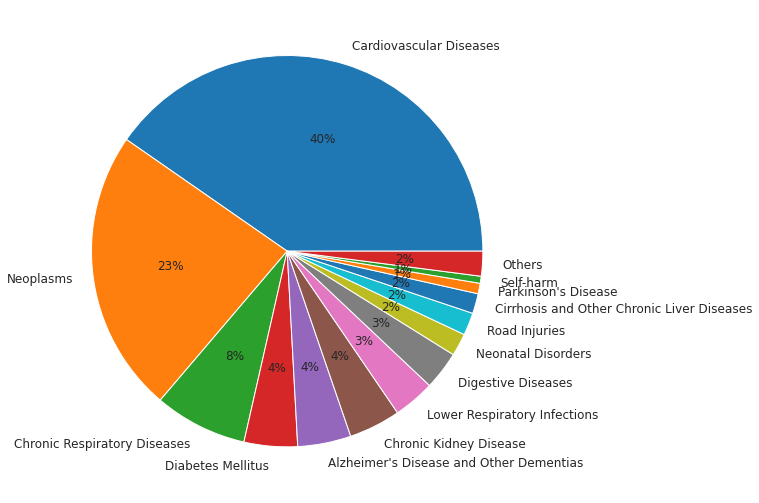

In [67]:
turkey_2017_pie = turkey_2017[turkey_2017>2000]
turkey_2017_pie["Others"] = sum(turkey_2017[turkey_2017<=2000])
turkey_2017_pie.plot(kind="pie",autopct="%.0f%%",figsize=(9,9),fontsize=12)
plt.ylabel("")

**Deadliest Year**
Deadliest year appears to be 2017 in terms of death counts, however this was due to the increase of the world population each year. We need to check death rate per year.

Text(0, 0.5, '# of Deaths')

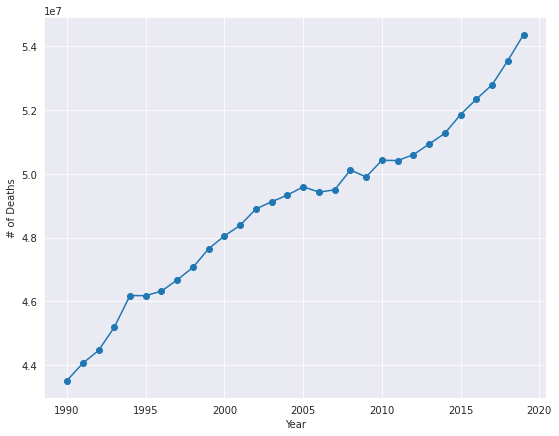

In [68]:
df["total_death"] = df.iloc[:,3:].sum(axis=1)
death_by_year = df.groupby("Year").sum()["total_death"]

fig = plt.figure(figsize=(9,7))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

Which country suffers from what disease the most?

In [69]:
df.Code = df.Code.dropna().apply(str.lower)
cause_by_country = df.groupby("Code").sum().drop(["Year","total_death"],axis=1).idxmax(axis=1)
cause_by_country.value_counts()

Cardiovascular Diseases         156
HIV/AIDS                         17
Neoplasms                        10
Diarrheal Diseases                7
Malaria                           5
Neonatal Disorders                4
Lower Respiratory Infections      4
Conflict and Terrorism            1
dtype: int64

Group countries by the most frequent disease types

In [70]:
cause_by_country = pd.DataFrame(list(zip(cause_by_country,cause_by_country.index)),columns=["Common Disease","Country"])
cause_by_country = cause_by_country.groupby("Common Disease").agg(list)

In order to colour countries by disease, lets use pygal package

In [60]:
!pip install pygal_maps_world
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We will need the pycountry package to convert 3 digit country codes to 2 digit country codes which is needed in pygal world mapping

In [71]:
import pycountry
country_mapping = {country.alpha_3.lower(): country.alpha_2.lower() for country in pycountry.countries}

Use pycountry to convert country names into country codes which will be used in the map

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


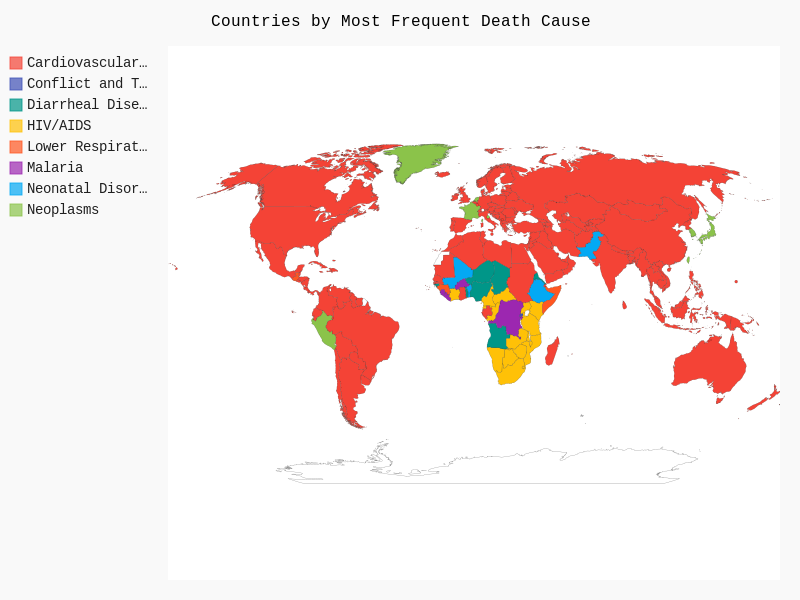

In [72]:
!pip install CairoSVG
from pygal_maps_world.maps import World
worldmap_chart = World()
worldmap_chart.title = 'Countries by Most Frequent Death Cause'

for cause in cause_by_country.index:
  countries = [country_mapping.get(country) for country in cause_by_country.loc[cause].values[0]]
  worldmap_chart.add(cause, countries)
  
worldmap_chart.render()
worldmap_chart

It is obvious that Cardiovascular Disease dominate death toll all over the world, how would the World map look if we took them out?

* It appears that the second most leading cause of death in rich countries like USA, Canada, Europe, Japan and Australia is **Dementia** (mainly caused by Alzheimer's disease). This could be due to the high frequency of elder people in their population.
* **Conflict** is leading cause for war territories like Syria and Palestine
* For Russia and their neighbours like old SSCB countries, Eastern European countries leading cause is **Digestive diseases like Ulcer, Cirrhosis, Hepatitis**. It could be related to excessive consumption of alcohol.
* **Diarrheal** diseases causes deaths mostly in the mid African region
* **HIV/AIDS** deaths are the most frequent in the South African region
* Some of the South American countries have **Homicide** as the leading cause for death
* Lower respiratory infections like **Tuberculosis, Pneumonia** is the leading cause for mainly South American countries like Brazil and Argentina.
* China, India and surrounding countries suffers from Respiratory diseases like **Asthma and Lung Cancer** etc.
* The countries where **road accidents** are one of the leading cause of death are in the Gulf region like Iran, Saudi Arabia, UAE. It could be related to their habit of car stunt driving.
* Greenland is the only country where **suicide** is leading cause of death.

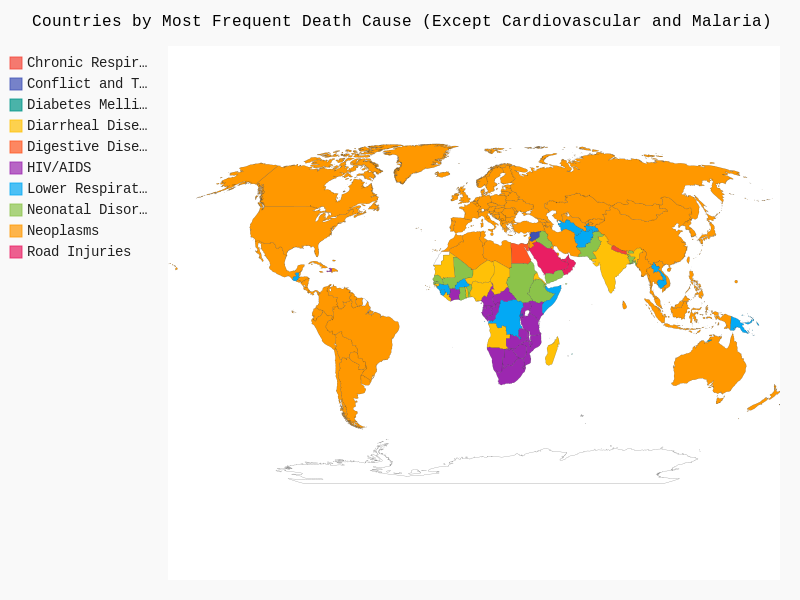

In [73]:
cause_by_country = df.groupby("Code").sum().drop(["Year","total_death","Cardiovascular Diseases","Malaria"],axis=1).idxmax(axis=1)
cause_by_country = pd.DataFrame(list(zip(cause_by_country,cause_by_country.index)),columns=["Common Disease","Country"])
cause_by_country = cause_by_country.groupby("Common Disease").agg(list)

worldmap_chart = World()
worldmap_chart.title = 'Countries by Most Frequent Death Cause (Except Cardiovascular and Malaria)'

for cause in cause_by_country.index:
  countries = [country_mapping.get(country) for country in cause_by_country.loc[cause].values[0]]
  worldmap_chart.add(cause, countries)
  
worldmap_chart.render()
worldmap_chart

Historical Trends of Diseases
Let's now group the diseases by their historical increasing or decreasing trends. Calculations will be based on deaths per 100000 for particular disease.

Following diseases show monotonic decrease trend over years:

Even though Digestive and Respiratory diseases were dropping constantly for period of time, they started to enter an increasing trend since 2013. Still way better as compared to 90s
Suicide rates are dropping since mid-90s
Peak in the Heat graph could be a mistake in the dataset or it is a very distinguishing event happened in 2010 which caused this sudden jump

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [75]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,total_death
0,Afghanistan,afg,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,afg,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,afg,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,afg,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,afg,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795


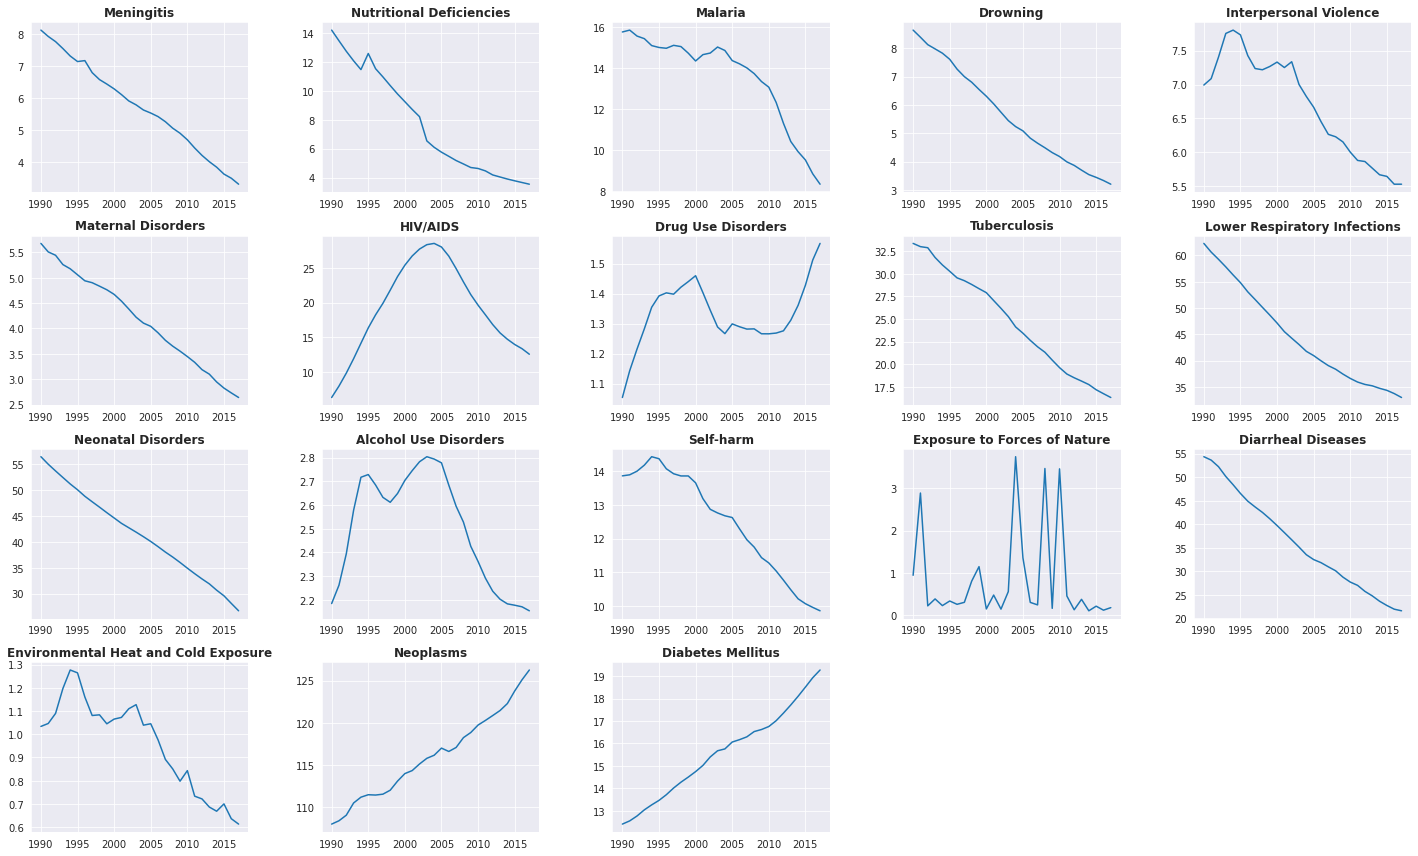

In [76]:
world_population.index = range(1990,2018)
yearly_counts = df.groupby("Year").sum()
yearly_counts = yearly_counts.apply(lambda x: 100000*x/world_population)

plt.figure(figsize=(20,12))
for i,cause in enumerate(yearly_counts[['Meningitis','Nutritional Deficiencies','Malaria','Drowning','Interpersonal Violence','Maternal Disorders','HIV/AIDS','Drug Use Disorders','Tuberculosis','Lower Respiratory Infections','Neonatal Disorders','Alcohol Use Disorders',
                                        'Self-harm','Exposure to Forces of Nature','Diarrheal Diseases','Environmental Heat and Cold Exposure','Neoplasms','Diabetes Mellitus',
                                       ]]):
  plt.subplot(4,5,i+1)
  sns.lineplot(x=yearly_counts.index,y=yearly_counts[cause])
  plt.title(cause,fontweight="bold")
  plt.ylabel("")
  plt.xlabel("")

plt.tight_layout()